In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

In [2]:
# Define image dimensions
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

In [3]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 activation (Activation)     (None, 223, 223, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      4128      
                                                                 
 activation_1 (Activation)   (None, 110, 110, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                   

In [4]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [5]:
# Data generators
train_data_dir = r'C:\Users\LENOVO\v_data\train'
test_data_dir = r'C:\Users\LENOVO\v_data\test'

In [6]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
train_data_gen = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=20,
    class_mode='binary'
)

Found 400 images belonging to 2 classes.


In [8]:
test_data_gen = datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=20,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.


In [9]:
# Train the model
epochs = 10
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=test_data_gen
)

Epoch 1/10
20/20 [==============================] - 10s 457ms/step - loss: 0.9422 - accuracy: 0.6025 - val_loss: 0.6547 - val_accuracy: 0.5200
Epoch 2/10
20/20 [==============================] - 8s 411ms/step - loss: 0.6141 - accuracy: 0.6650 - val_loss: 0.4034 - val_accuracy: 0.8900
Epoch 3/10
20/20 [==============================] - 8s 408ms/step - loss: 0.4900 - accuracy: 0.7750 - val_loss: 0.7659 - val_accuracy: 0.5700
Epoch 4/10
20/20 [==============================] - 8s 417ms/step - loss: 0.3936 - accuracy: 0.8425 - val_loss: 0.4597 - val_accuracy: 0.7800
Epoch 5/10
20/20 [==============================] - 8s 407ms/step - loss: 0.3461 - accuracy: 0.8750 - val_loss: 0.3724 - val_accuracy: 0.8400
Epoch 6/10
20/20 [==============================] - 8s 414ms/step - loss: 0.2885 - accuracy: 0.8925 - val_loss: 0.3219 - val_accuracy: 0.8800
Epoch 7/10
20/20 [==============================] - 8s 411ms/step - loss: 0.2245 - accuracy: 0.9100 - val_loss: 0.2768 - val_accuracy: 0.9000
Epoch

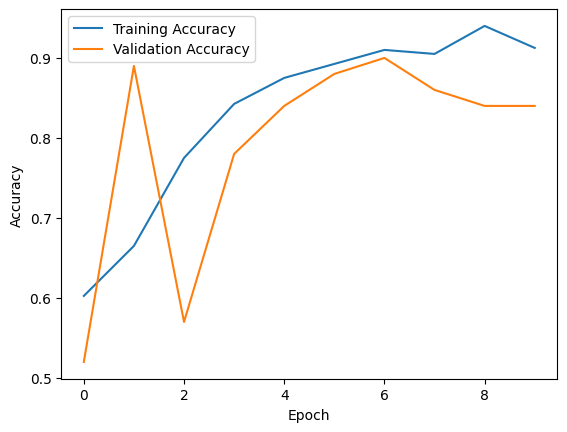

In [10]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

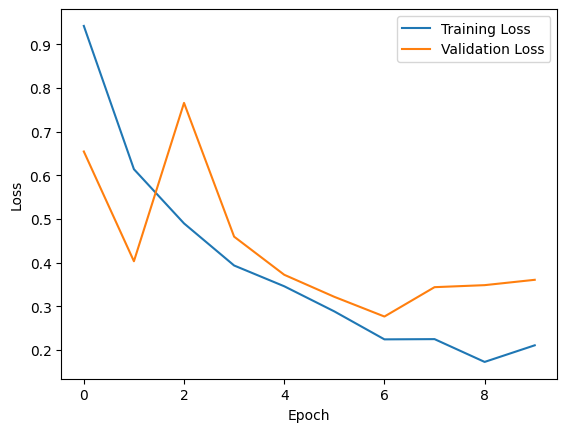

In [11]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Load a new test image and make a prediction
def load_and_predict(image_path):
    img = load_img(image_path, target_size=(img_width, img_height))
    x = np.array(img) / 255.0
    x = x.reshape(1, img_width, img_height, 3)

    prediction = model.predict(x)
    return prediction[0][0]

def classify_image(image_path):
    prediction = load_and_predict(image_path)

    if prediction >= 0.5:
        prediction_text = "It's a plane!"
    else:
        prediction_text = "It's a car!"

    # Display the image and prediction
    plt.imshow(load_img(image_path))
    plt.title(prediction_text + f" (Probability: {round(prediction, 4)})")
    plt.axis('off')
    plt.show()

Enter the path to your test image: C:\Users\LENOVO\v_data\train\planes\101.jpg
1/1 [==============================] - 0s 151ms/step


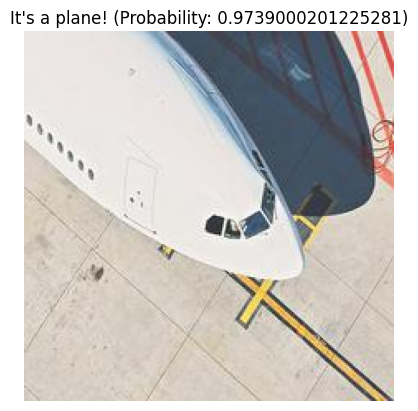

Do you want to continue? (yes/no): yes


In [ ]:
# Allow user to input their own image and continue
while True:
    user_image_path = input("Enter the path to your test image: ")
    classify_image(user_image_path)

    choice = input("Do you want to continue? (yes/no): ")
    if choice.lower() != 'yes':
        break